<h1><center><font size="5">Customer Churn Prediction</font></center></h1>
<h1><center><font size="5">Did you know that attracting a new customer costs five times as much as keeping an existing one?
</font></center></h1>
<center><img src="https://miro.medium.com/v2/resize:fit:1024/1*WZdoYPpmiIk1AcPQ1YHWug.png" width="900"></img></center>

---

# Content

<a id="toc"></a>
- [1. Introduction](#1)
    - [1.1 Import Libraries](#1.1)
    - [1.2 Import Data](#1.2)
    - [1.3 Dataset Attributes](#1.3)
- [2. dataset - Quick overview](#2)
    - [2.1 Dataset - Basic statistics](#2.1)
    - [2.2 Dataset - Data types](#2.2)
    - [2.3 Train Dataset Overiew](#2.3)
    - [2.4 Test Dataset Overiew](#2.4)
    - [2.5 Quick overview](#2.5) 
- [3. Exploratory Data Analysis](#3)
    - [3.1 Customer churn in Train Data ](#3.1)
    - [3.2 Customer churn in Test Data ](#3.2)
    - [3.3 Support Calls ](#3.3)
    - [3.4 Payment Delay ](#3.4)
    
    
- [4. Dealing with Null values](#4)
    - [4.1 Dealing with duplicated values](#4.1)
    - [4.2 Outliers Analysis ](#4.2)
    
- [5. correlation between the features](#5)

- [6. Label Encoding](#6)   
   
- [7. Feature Scaling ](#7)
    - [7.1 Feature Selection ](#7.1)


   
- [8. Logistic Regression](#8)

- [9. Confusion Matrix ](#9)

- [10. Save Model ](#10)
   


<a id="1"></a>
## <b>1 <span style='color:#2b4f92'>Introduction</span></b> 

### What is Customer Churn?
- Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.


- Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.


- Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.


- Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.



- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


- To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.


- As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

---

In [74]:
import os
os.chdir(r"D:\Unique_Interns\Proj3_Customer Churn Prediction")

<a id="1.1"></a>
## <b>1.1 <span style='color:#2b4f92'>Import Libraries</span></b> 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump

<a id="1.2"></a>
## <b>1.2 <span style='color:#2b4f92'>Import Data</span></b> 

In [76]:
df = pd.read_csv(r"customer_churn_dataset-training-master.csv")
df_Test = pd.read_csv(r"customer_churn_dataset-testing-master.csv")

<a id="1.3"></a>
## <b>1.3 <span style='color:#2b4f92'>Dataset Attributes</span></b> 


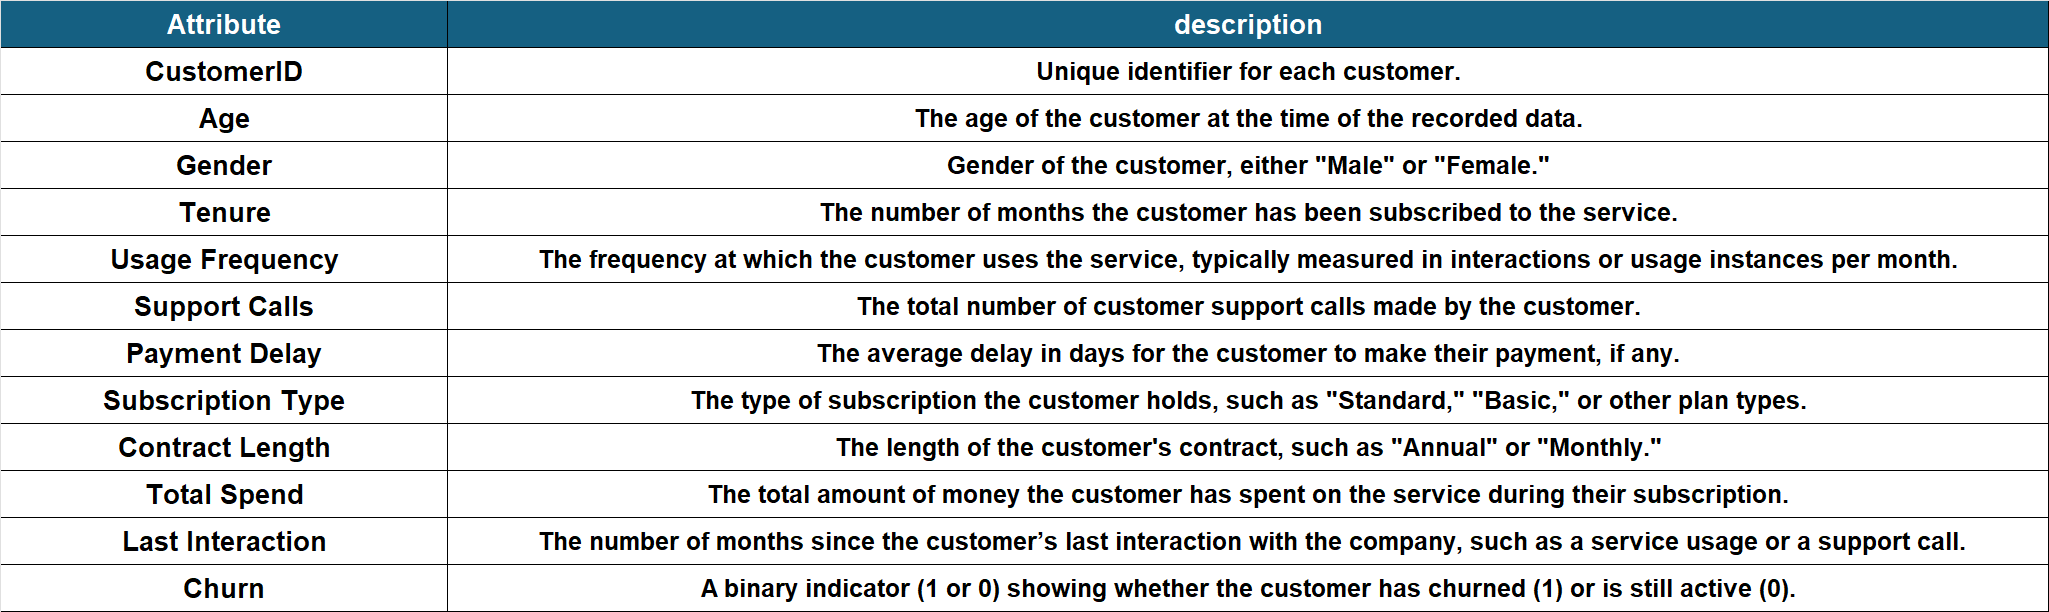

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
## <b>2<span style='color:#2b4f92'> dataset - Quick overview</span></b> 

In [77]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


<a id="2.1"></a>
## <b>2.1 <span style='color:#2b4f92'>dataset - Basic statistics</span></b>

In [78]:
df.describe().style.background_gradient(vmin=0)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


<a id="2.2"></a>
## <b>2.2 <span style='color:#2b4f92'> dataset - Data types</span></b> 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [80]:
for column in df.columns:
    unique_values = len(df[column].unique())
    print(f"Number of unique values in {column}: {unique_values}")

Number of unique values in CustomerID: 440833
Number of unique values in Age: 49
Number of unique values in Gender: 3
Number of unique values in Tenure: 61
Number of unique values in Usage Frequency: 31
Number of unique values in Support Calls: 12
Number of unique values in Payment Delay: 32
Number of unique values in Subscription Type: 4
Number of unique values in Contract Length: 4
Number of unique values in Total Spend: 68364
Number of unique values in Last Interaction: 31
Number of unique values in Churn: 3


In [81]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

<a id="2.3"></a>
## <b>2.3 <span style='color:#2b4f92'> Train Dataset Overiew </span></b> 

In [82]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 440833

Number of features: 12

Features:
['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']

Missing values: 12

Unique values:
CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64


<a id="2.4"></a>
## <b>2.4 <span style='color:#2b4f92'> Test Dataset Overiew </span></b> 

In [83]:
dataoveriew(df_Test, 'Overiew of the test dataset')

Overiew of the test dataset:

Rows: 64374

Number of features: 12

Features:
['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']

Missing values: 0

Unique values:
CustomerID           64374
Age                     48
Gender                   2
Tenure                  60
Usage Frequency         30
Support Calls           11
Payment Delay           31
Subscription Type        3
Contract Length          3
Total Spend            901
Last Interaction        30
Churn                    2
dtype: int64


<a id="2.5"></a>
## <b>2.5 <span style='color:#2b4f92'> Quick overview</span></b> 

#### Train dataset contains 440,833 rows and 12 columns, providing detailed information about customer behavior and subscription data. Here's a summary:

- Columns and Data Types:
  - The dataset includes 9 numeric columns (dtype: float64) and 3 categorical columns (dtype: object).


- Missing Values:
  - Each column has one missing value, as the non-null count is 440,832 compared to the total 440,833 rows. This is likely a data entry error and can be addressed by removing the corresponding rows.
  
  
- Target Column:
  - The Churn column is the target variable, indicating whether a customer has churned (1) or remains active (0).

#### The test dataset contains 64,374 rows and 12 columns, providing customer data for model evaluation. Here's a breakdown:

- Columns and Data Types:
  - The dataset includes 9 numeric columns (dtype: float64) and 3 categorical columns (dtype: object).
 

- Missing Values:
  - There are no missing values in the dataset, ensuring clean and complete data for evaluation.


- Target Column:
  - The Churn column is the target variable for evaluation. It shows whether a customer has churned (1) or remains active (0).


<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
## <b>3 <span style='color:#2b4f92'> Exploratory Data Analysis </span></b> 

<a id="3.1"></a>
## <b>3.1 <span style='color:#2b4f92'> Customer churn in Train Data </span></b> 

In [84]:
trace = go.Pie(labels = df["Churn"].value_counts().keys().tolist(),
               values = df["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<a id="3.2"></a>
## <b>3.2 <span style='color:#2b4f92'> Customer churn in Test Data </span></b> 

In [85]:
trace = go.Pie(labels = df_Test["Churn"].value_counts().keys().tolist(),
               values = df_Test["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in Test data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

<a id="3.3"></a>
## <b>3.3 <span style='color:#2b4f92'> Support Calls </span></b> 

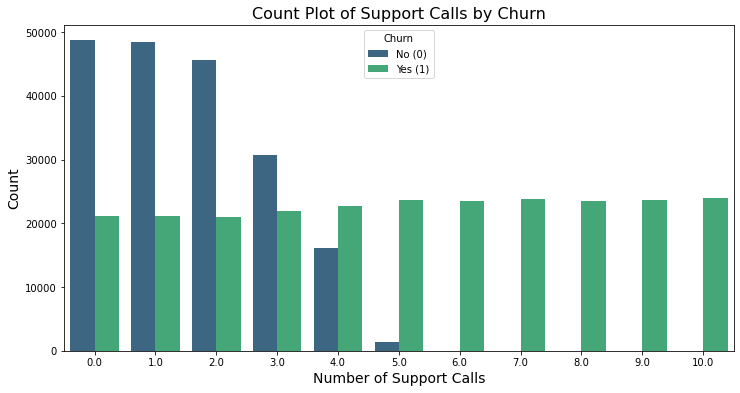

In [86]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='Support Calls', hue='Churn', palette='viridis')

plt.title('Count Plot of Support Calls by Churn', fontsize=16)
plt.xlabel('Number of Support Calls', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', labels=['No (0)', 'Yes (1)'])
plt.show()

- The analysis reveals a strong relationship between Support Calls and Churn. As the number of support calls increases, the likelihood of customer churn significantly rises. This trend indicates that customers who frequently contact support are more likely to discontinue their subscription, potentially due to unresolved issues or dissatisfaction with the service.

<a id="3.4"></a>
## <b>3.4 <span style='color:#2b4f92'> Payment Delay </span></b> 

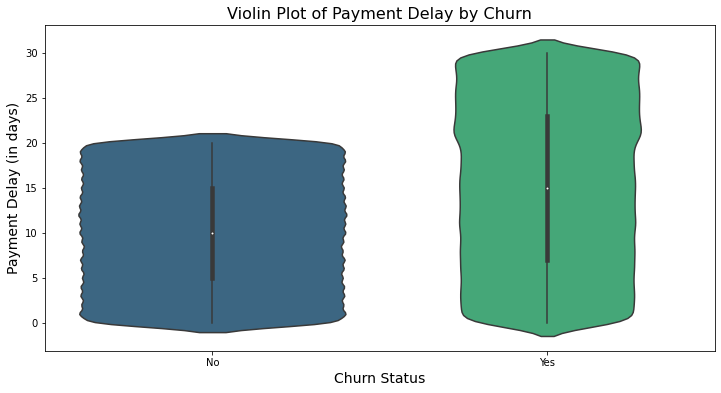

In [87]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Churn', y='Payment Delay', palette='viridis')

plt.title('Violin Plot of Payment Delay by Churn', fontsize=16)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Payment Delay (in days)', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

- The analysis shows a clear relationship between Payment Delay and Churn. Customers who experience longer payment delays tend to have a higher likelihood of churning. This suggests that delayed payments may indicate dissatisfaction or financial issues, which could lead to customers discontinuing their service. However, even with shorter delays, some customers still churn, highlighting that other factors may also contribute to the decision to leave.

---

<a id="4"></a>
## <b>4 <span style='color:#2b4f92'> Dealing With Null Values </span></b> 

In [88]:
empty_rows = df[df.isnull().all(axis=1)]
empty_rows

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [90]:
df = df.drop(index=199295)

In [91]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

<a id="4.1"></a>
## <b>4.1 <span style='color:#2b4f92'> Dealing with duplicated values </span></b> 

In [92]:
print('Number of duplicated values in dataset: ', df.duplicated().sum())

Number of duplicated values in dataset:  0


In [93]:
print('Number of duplicated values in dataset: ', df_Test.duplicated().sum())

Number of duplicated values in dataset:  0


- This is important because duplicate records can skew data analysis, leading to inaccurate insights. Since there are no duplicates in this dataset, we can confidently proceed with the analysis without needing to remove redundant data. This ensures the integrity and reliability of the results derived from the dataset.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="4.2"></a>
## <b>4.2 <span style='color:#2b4f92'> Outliers Analysis </span></b> 

In [94]:
x = ['Tenure','Last Interaction']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in Tenure
No outliers in Last Interaction


<a id="5"></a>
## <b>5 <span style='color:#2b4f92'> correlation between the features </span></b> 

In [95]:
df.corr()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.181977,0.044129,0.038455,-0.482894,-0.262029,0.359289,-0.125356,-0.839365
Age,-0.181977,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,0.044129,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,0.038455,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,-0.482894,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,-0.262029,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,0.359289,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,-0.125356,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,-0.839365,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


- As we discussed earlier, it is clear that there is a strong relationship between Payment Delay and Support Calls with Churn. Both factors seem to be closely linked to the likelihood of customers leaving. Longer payment delays and increased support calls are indicators that customers may be facing difficulties or dissatisfaction, which ultimately leads to a higher churn rate. This insight suggests that addressing payment issues and improving customer support may help in reducing churn.

<AxesSubplot:>

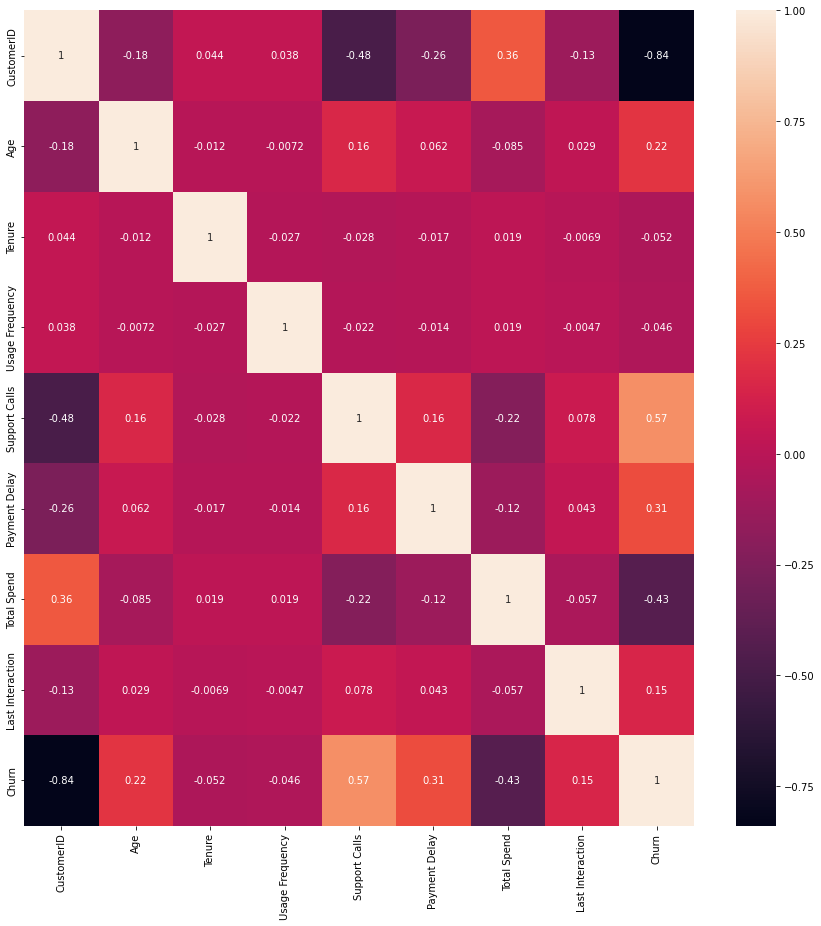

In [96]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

---

<a id="6"></a>
## <b>6 <span style='color:#2b4f92'> Label Encoding </span></b> 

In [97]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [98]:
label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'Subscription Type', 'Contract Length']

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [99]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


---

<a id="7"></a>
## <b>7 <span style='color:#2b4f92'> Feature Scaling </span></b> 

In [100]:
scaler = StandardScaler()
scaler.fit(df.drop(['Churn'],axis = 1))
scaled_features = scaler.transform(df.drop('Churn',axis = 1))

<a id="7.1"></a>
## <b>7.1 <span style='color:#2b4f92'> Feature Selection </span></b> 

In [101]:
X = scaled_features
Y = df['Churn']

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

<a id="8"></a>
## <b>8 <span style='color:#2b4f92'> Logistic Regression </span></b> 

In [103]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [104]:
predR = logmodel.predict(X_test)

In [105]:
print(classification_report(Y_test,predR))
print(confusion_matrix(Y_test,predR))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     57253
         1.0       0.98      0.98      0.98     74997

    accuracy                           0.98    132250
   macro avg       0.98      0.98      0.98    132250
weighted avg       0.98      0.98      0.98    132250

[[55886  1367]
 [ 1614 73383]]


In [106]:
logmodel.score(X_test,Y_test)

0.9774593572778828

<a id="9"></a>
## <b>9 <span style='color:#2b4f92'> confusion matrix </span></b> 

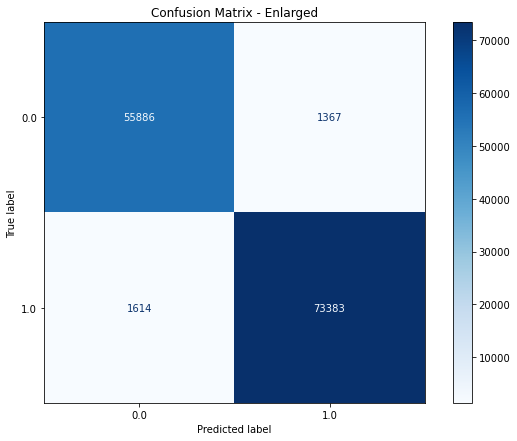

In [107]:
cm = confusion_matrix(Y_test, predR)

plt.figure(figsize=(10, 7))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)

disp.plot(cmap=plt.cm.Blues, ax=plt.gca()) 
plt.title("Confusion Matrix - Enlarged")

plt.show()

<a id="10"></a>
## <b>10 <span style='color:#2b4f92'> Save Model </span></b> 

In [68]:
dump(logmodel, 'logistic_model.joblib')

print("Model saved as logistic_model.joblib")

Model saved as logistic_model.joblib


# Thank You